### Task 1 

Import the "cameraman.jpeg" image and apply

<img src = Images/cameraman.jpeg style="width:300px;height:300px">

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector 

d) Edge detection using difference of Gaussians (DoG)
    
Note: 
1. You can't use opencv or any other library function to detect edges
2. Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

In [2]:
# Function for displaying image
def display(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Load the image
cameraman = np.array(Image.open('./Images/cameraman.jpeg'))#.convert('L'))

In [3]:
# Function to perform convolution
def custom_convolution(image, kernel):
    result = np.zeros_like(image, dtype=np.float32)
    kernel_size = len(kernel)
    padding = kernel_size // 2

    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            result[i, j] = np.sum(image[i - padding:i + padding + 1, j - padding:j + padding + 1] * kernel)

    return result

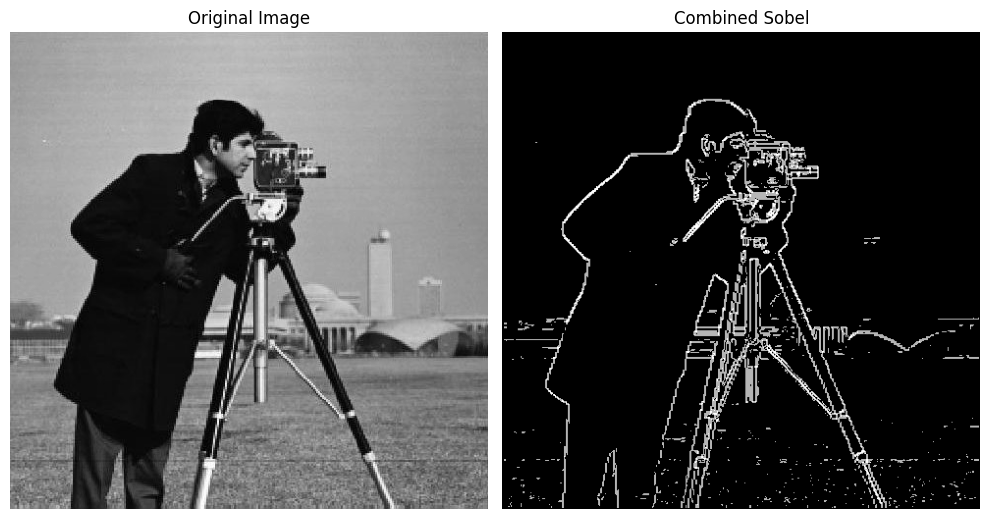

In [4]:
# Input image
img = cameraman
# 1 a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)
# Sobel filter kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])
# Partial derivative in x-direction using Sobel
edge_x_sobel = custom_convolution(img, sobel_x)/8

# Partial derivative in y-direction using Sobel
edge_y_sobel = custom_convolution(img, sobel_y)/8

# Normalize the output images for Sobel
edge_x_sobel = (edge_x_sobel - np.min(edge_x_sobel)) / (np.max(edge_x_sobel) - np.min(edge_x_sobel)) * 255
edge_y_sobel = (edge_y_sobel - np.min(edge_y_sobel)) / (np.max(edge_y_sobel) - np.min(edge_y_sobel)) * 255

# Set an intensity threshold
high_threshold = 160
low_threshold = 100

# Apply intensity threshold to highlight edges (white)
edge_x_sobel[(edge_x_sobel > high_threshold)|(edge_x_sobel < low_threshold)] = 255
edge_y_sobel[(edge_y_sobel > high_threshold)|(edge_y_sobel < low_threshold)] = 255

# Set pixel values below the threshold to black
edge_x_sobel[(edge_x_sobel <= high_threshold)&(edge_x_sobel >= low_threshold)] = 0
edge_y_sobel[(edge_y_sobel <= high_threshold)&(edge_y_sobel >= low_threshold)] = 0

# Combine Sobel X and Sobel Y
combined_edges_sobel = np.sqrt(np.square(edge_x_sobel) + np.square(edge_y_sobel))

# Display images in rows
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Sobel
axes[0].imshow(img, cmap='gray')
axes[1].imshow(combined_edges_sobel, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].set_title('Combined Sobel')
axes[1].axis('off')
plt.tight_layout()
plt.show()

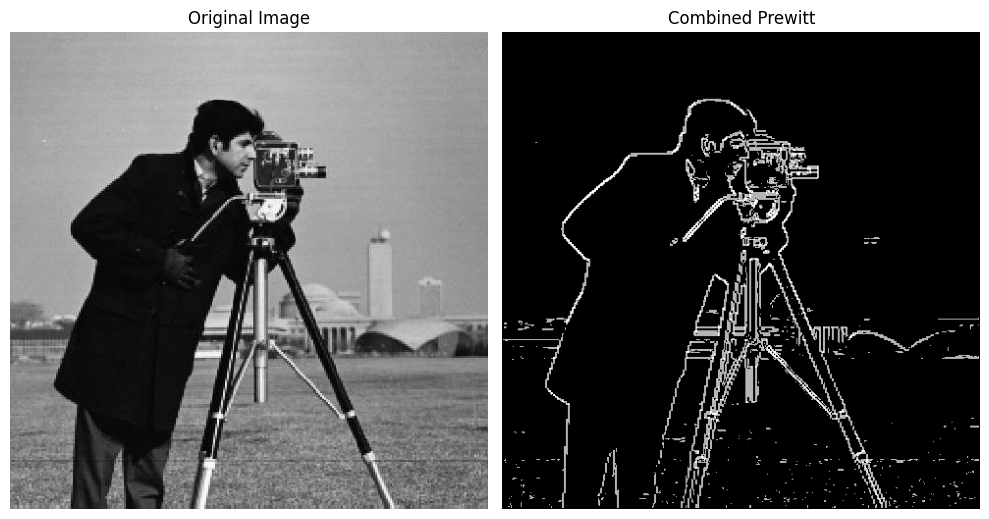

In [5]:
# 1 b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)
# Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

# Partial derivative in x-direction using Prewitt
edge_x_prewitt = custom_convolution(img, prewitt_x)

# Partial derivative in y-direction using Prewitt
edge_y_prewitt = custom_convolution(img, prewitt_y)

# Normalize the output images for Prewitt
edge_x_prewitt = (edge_x_prewitt - np.min(edge_x_prewitt)) / (np.max(edge_x_prewitt) - np.min(edge_x_prewitt)) * 255
edge_y_prewitt = (edge_y_prewitt - np.min(edge_y_prewitt)) / (np.max(edge_y_prewitt) - np.min(edge_y_prewitt)) * 255

# Apply intensity threshold to highlight edges (white)
edge_x_prewitt[(edge_x_prewitt > high_threshold)|(edge_x_prewitt < low_threshold)] = 255
edge_y_prewitt[(edge_y_prewitt > high_threshold)|(edge_y_prewitt < low_threshold)] = 255

# Set pixel values below the threshold to black
edge_x_prewitt[(edge_x_prewitt <= high_threshold)&(edge_x_prewitt >= low_threshold)] = 0
edge_y_prewitt[(edge_y_prewitt <= high_threshold)&(edge_y_prewitt >= low_threshold)] = 0

# Combine Prewitt X and Prewitt Y
combined_edges_prewitt = np.sqrt(np.square(edge_x_prewitt) + np.square(edge_y_prewitt))

# Display images in rows
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Prewitt
axes[0].imshow(img, cmap='gray')
axes[1].imshow(combined_edges_prewitt, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].set_title('Combined Prewitt')
axes[1].axis('off')
plt.tight_layout()
plt.show()


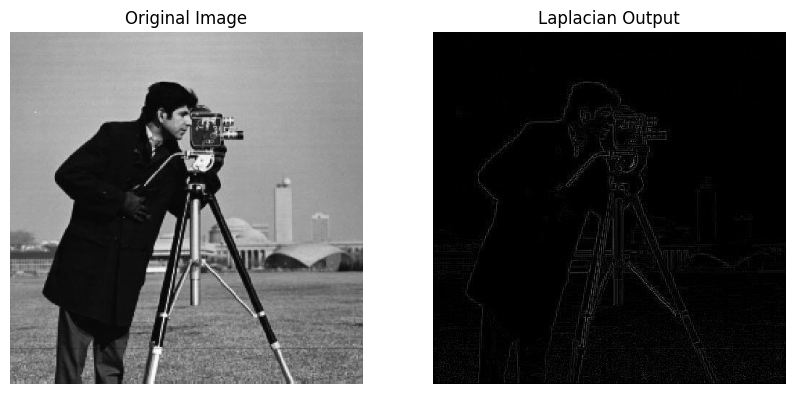

In [6]:
# 1 c) Laplacian Edge Detector

laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])

# Apply Laplacian filter to the original image without normalization
edge_laplacian = custom_convolution(img, laplacian)

# Set the background of the Laplacian output to black
edge_laplacian[edge_laplacian < 0] = 0

# Display the original image and the Laplacian output
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Display original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display Laplacian output with black background
axes[1].imshow(edge_laplacian, cmap='gray')
axes[1].set_title('Laplacian Output')
axes[1].axis('off')

plt.show()


(-0.5, 486.5, 486.5, -0.5)

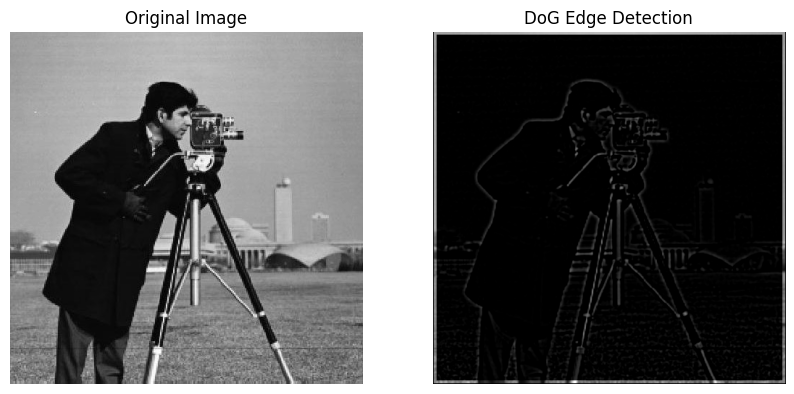

In [7]:
# d) Edge detection using difference of Gaussians (DoG)

def gaussian_blur(image, sigma):
    if sigma == 0:
        return image.copy()

    size = int(2 * sigma + 1)
    if size % 2 == 0:
        size += 1

    kernel = gaussian_kernel(sigma, size)
    blurred_image = custom_convolution(image, kernel)

    return blurred_image

def gaussian_kernel(sigma, size):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Function for DoG (Difference of Gaussians)
def difference_of_gaussians(image, sigma1, sigma2):
    blurred1 = gaussian_blur(image, sigma1)
    blurred2 = gaussian_blur(image, sigma2)

    return blurred1 - blurred2

# Apply DoG for edge detection
sigma1 = 1.0
sigma2 = 5.02
edge_dog = difference_of_gaussians(img, sigma1, sigma2)

edge_dog[edge_dog < 0] = 0

# Display the original image and DoG Edge Detection output
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Display original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display DoG Edge Detection output with black background
axes[1].imshow(edge_dog, cmap='gray')
axes[1].set_title('DoG Edge Detection')
axes[1].axis('off')

### Task 2 

<img src = Images/zebra.jpeg>

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below: 

    - Smooth the image to remove the noise (Gaussian filter)
    - Find the gradients of the image
    - Apply non-maximum suppression
    - Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

Implement "Canny Edge Detector" from scratch using the steps above (for each step above, you can use library functions) and compare your result on "cameraman.jpeg" image with OpenCV implementation of "Canny Edge Detector" (https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

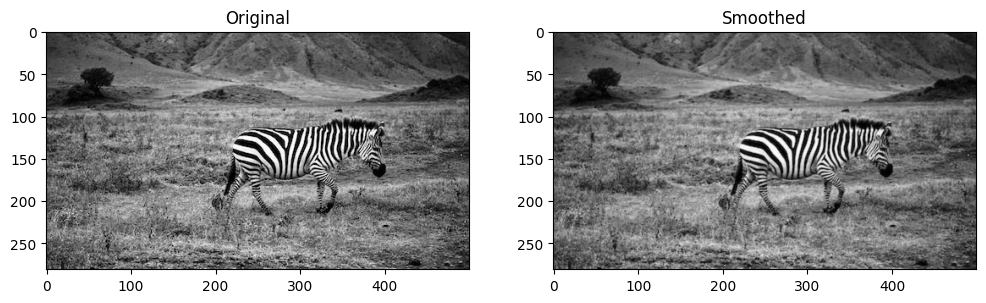

In [8]:
import cv2
# Read the Image
zebra = cv2.imread('./Images/zebra.jpeg')

# Apply Gaussian Filter
kernel_size = (5, 5)
sigma = 0.5
smoothed_image = cv2.GaussianBlur(zebra, kernel_size, sigma)

# Display Results (Optional)
plt.figure(figsize=(12, 6))  # Set the figure size to make images larger
plt.subplot(121), plt.imshow(zebra, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed')
plt.show()

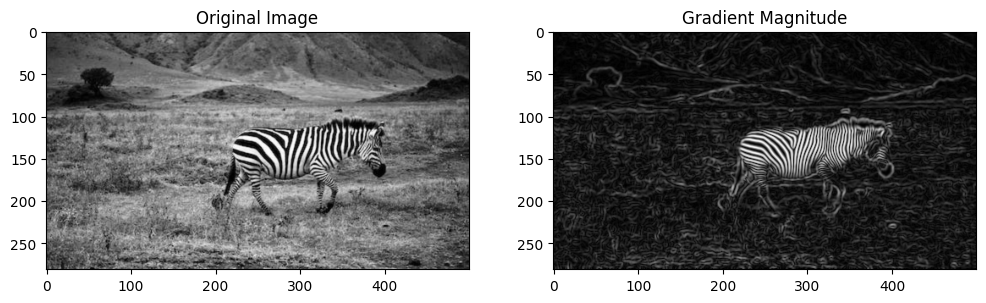

In [9]:
def hough_transform_lines_with_gradients(smoothed_image): #, rho_resolution=1, theta_resolution=np.pi/180, threshold=100):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale image for smoothing
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Sobel operator to compute gradients
    gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the gradients to get the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to 8-bit for visualization
    normalized_gradient = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    # Set the figure size for larger display
    plt.figure(figsize=(12, 6))

    # Display the original image and the Sobel gradient magnitude using matplotlib
    plt.subplot(121), plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(122), plt.imshow(normalized_gradient, cmap='gray'), plt.title('Gradient Magnitude')
    plt.show()

    return normalized_gradient

# Call the function with the smoothed image
gradient_image = hough_transform_lines_with_gradients(smoothed_image)

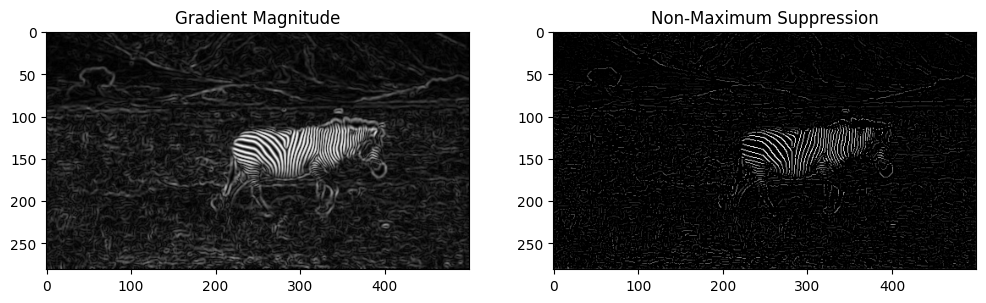

In [10]:
def non_maximum_suppression(gradient_image):
    # Compute gradient direction
    gradient_x = cv2.Sobel(gradient_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gradient_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    # Apply non-maximum suppression
    result = gradient_image.copy()

    for i in range(1, gradient_image.shape[0] - 1):
        for j in range(1, gradient_image.shape[1] - 1):
            direction = gradient_direction[i, j]

            # Check the direction and compare with neighbors
            if (0 <= direction < 22.5) or (157.5 <= direction <= 180) or (-22.5 <= direction < 0) or (-180 <= direction < -157.5):
                neighbors = [gradient_image[i, j - 1], gradient_image[i, j + 1]]
            elif (22.5 <= direction < 67.5) or (-157.5 <= direction < -112.5):
                neighbors = [gradient_image[i - 1, j - 1], gradient_image[i + 1, j + 1]]
            elif (67.5 <= direction < 112.5) or (-112.5 <= direction < -67.5):
                neighbors = [gradient_image[i - 1, j], gradient_image[i + 1, j]]
            else:  # (-67.5 <= direction < -22.5) or (112.5 <= direction < 157.5)
                neighbors = [gradient_image[i - 1, j + 1], gradient_image[i + 1, j - 1]]

            local_max = np.max(neighbors)
            if gradient_image[i, j] < local_max:
                result[i, j] = 0

    # Display the original gradient image and the result after non-maximum suppression
    plt.figure(figsize=(12, 6))

    plt.subplot(121), plt.imshow(gradient_image, cmap='gray'), plt.title('Gradient Magnitude')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Non-Maximum Suppression')

    plt.show()

    return result

# Call the non-maximum suppression function with the gradient image
edges_suppressed = non_maximum_suppression(gradient_image)

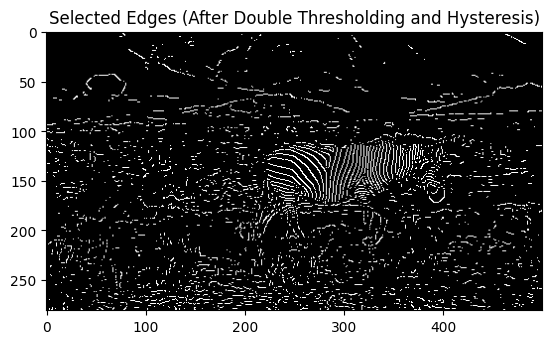

In [11]:
def apply_double_threshold(result, low_threshold, high_threshold):
    # Apply double thresholding
    strong_edges = (result >= high_threshold)
    weak_edges = (result >= low_threshold) & (result < high_threshold)

    # Use connected components to label weak edges and identify connected components
    _, labels, stats, _ = cv2.connectedComponentsWithStats(weak_edges.astype(np.uint8), connectivity=8)

    # Find the label of the largest connected component (excluding background)
    largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # Create a mask for the selected edges (both strong and connected weak edges)
    selected_edges = (strong_edges | (labels == largest_component_label)).astype(np.uint8) * 255

    return selected_edges

# Specify the double threshold values
low_threshold = 15
high_threshold = 45

# Apply double thresholding and hysteresis
selected_edges = apply_double_threshold(edges_suppressed, low_threshold, high_threshold)

# Display the result after double thresholding and hysteresis
plt.imshow(selected_edges, cmap='gray')
plt.title('Selected Edges (After Double Thresholding and Hysteresis)')
plt.show()

(Text(0.5, 1.0, 'Canny Edge using openCV'), ([], []), ([], []))

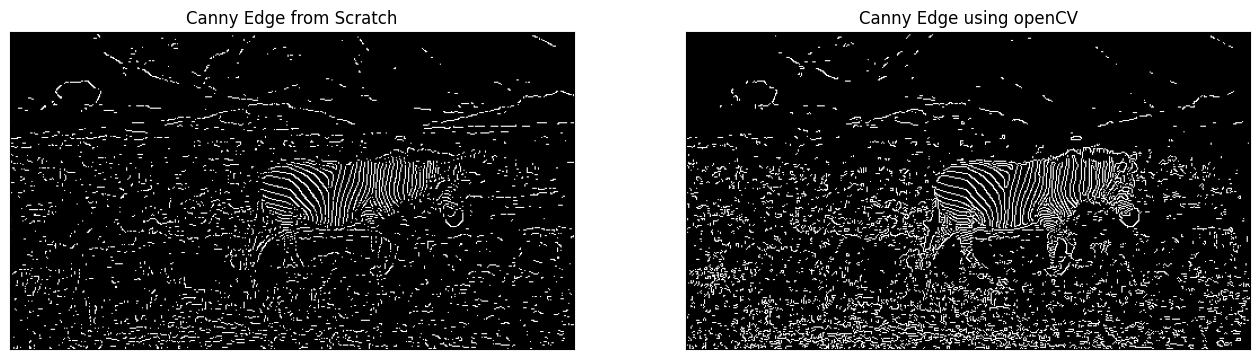

In [12]:
# comparing result of Canny Edge Detection from Scratch "zebra.jpeg" image with OpenCV implementation of "Canny Edge Detector"
#edges = cv2.Canny(zebra,250,300)
edges = cv2.Canny(zebra,270,320)
plt.figure(figsize=(16, 6))
plt.subplot(121),plt.imshow(selected_edges,cmap = 'gray')
plt.title('Canny Edge from Scratch'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge using openCV'), plt.xticks([]), plt.yticks([])

### Task 3 

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You can't use cv2.HoughLines() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

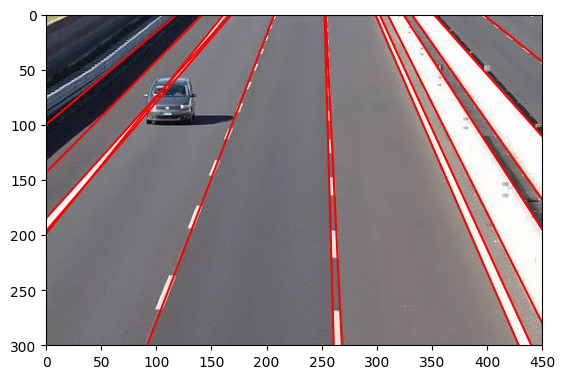

In [13]:
#somewhat correct
from skimage import color, transform, feature

#def hough_transform(image, theta_res=2, threshold=1800):
def hough_transform(image, theta_res, threshold):
    # Convert image to grayscale
    gray_image = color.rgb2gray(image)

    # Create binary edge image using Canny edge detector
    edges = feature.canny(gray_image)

    # Hough Transform
    hough_space, angles, distances = transform.hough_line(edges, theta=np.linspace(-np.pi/2, np.pi/2, int(1640/theta_res)))

    # Extract lines based on the hough space and threshold
    lines = transform.hough_line_peaks(hough_space, angles, distances, threshold=threshold)

    return lines

def plot_detected_lines(image, lines):
    # Plot the original image
    plt.imshow(image, cmap='gray')

    # Plot the detected lines
    for _, angle, dist in zip(*lines):
        a = np.cos(angle)
        b = np.sin(angle)
        x0 = a * dist
        y0 = b * dist
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        plt.plot([x1, x2], [y1, y2], 'r')

    # Set custom plot limits and aspect ratio
    plt.xlim(0, 450)
    plt.ylim(300, 0)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

# Loading image
image_path = './Images/lines.jpg'
image = plt.imread(image_path)

# Perform Hough Transform
lines = hough_transform(image, theta_res=1, threshold=95)

# Plot the original image with detected lines
plot_detected_lines(image, lines)


### Task 4  

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/coins.jpeg>

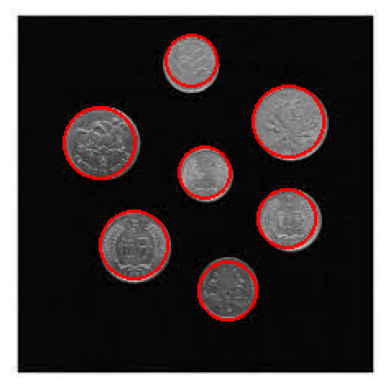

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Hough Circle Transform Implementation
def perform_hough_transform(edges, radius_range):
    rows, cols = edges.shape
    radius_min, radius_max = radius_range
    accumulator = np.zeros((rows, cols, radius_max - radius_min))
    
    edge_points = np.argwhere(edges)  # Get coordinates of edge points

    for radius in range(radius_min, radius_max):
        # Vote for each edge point and possible circle center
        for x, y in edge_points:
            for theta in np.deg2rad(np.arange(0, 360)):
                a = x - int(radius * np.cos(theta))
                b = y - int(radius * np.sin(theta))
                if 0 <= a < rows and 0 <= b < cols:
                    accumulator[a, b, radius - radius_min] += 1

    return accumulator

# Detect circles in the accumulator array
def detect_circles(accumulator, radius_min, threshold, min_distance=15):
    rows, cols, num_radii = accumulator.shape
    detected_circles = []

    for r_idx in range(num_radii):
        radius = r_idx + radius_min
        for x, y in np.argwhere(accumulator[:, :, r_idx] >= threshold):
            if is_far_from_existing_circles(x, y, detected_circles, min_distance):
                detected_circles.append((y, x, radius))

    return detected_circles

# Check if a point is sufficiently far from existing circle centers
def is_far_from_existing_circles(x, y, circles, min_distance):
    return all(np.sqrt((y - cx) ** 2 + (x - cy) ** 2) >= min_distance for cx, cy, _ in circles)

# Draw detected circles on the original image
def draw_circles_on_image(image_path, circles):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for x_center, y_center, radius in circles:
        top_left = (x_center - radius, y_center - radius)
        bottom_right = (x_center + radius, y_center + radius)
        draw.ellipse([top_left, bottom_right], outline='red', width=2)

    return image

# Load and preprocess the image (grayscale conversion, edge detection)
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(grayscale_image, 370, 420)
    return edges

#  Main function to run the circle detection pipeline
def main(image_path):
    edges = preprocess_image(image_path)
    
    # Circle detection parameters
    radius_range = (16, 26)
    threshold = 110

    # Apply Hough transform and detect circles
    accumulator = perform_hough_transform(edges, radius_range)
    circles = detect_circles(accumulator, radius_range[0], threshold)

    # Draw and display the detected circles
    output_image = draw_circles_on_image(image_path, circles)
    plt.imshow(output_image)
    plt.axis('off') 
    plt.show()

# Execute the main function with the provided image path
if __name__ == "__main__":
    image_path = './Images/coins.jpeg'  # Update with your actual image path
    main(image_path)
